In [3]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [4]:
# In R, I exported the dataset from package 'ISLR' to an Excel file
df = pd.read_excel('Default.xlsx')

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

# removing zero LTI 
df = df[df['LTI']!= 0]
df.head(3)

,ID,default,student,balance,income,Age,LTI,Months Delayed,default2,student2
0,1,No,No,729.526495,44361.625074,50.0,0.016445,0,0,0
1,2,No,Yes,817.180407,12106.134700,25.0,0.067501,0,0,1
2,3,No,No,1073.549164,31767.138947,39.0,0.033794,0,0,0


In [5]:

X = df[['balance','income', 'Age', 'LTI','Months Delayed', 'student2']].values

y = df.default2.values


ridgereg = Ridge(alpha=5,normalize=True)
ridgereg.fit(X,y)
y_pred = ridgereg.predict(X)

#Return the result in pre-defined format
rss = sum((y_pred-y**2))
ret = [rss]
ret.extend([ridgereg.intercept_])
ret.extend(ridgereg.coef_)
ret

[5.468292485488746e-12,
 0.16223014860863058,
 1.2690059563233854e-08,
 -6.597733148619712e-09,
 -0.0002601238534357236,
 0.01175458290430976,
 0.009737469890911588,
 0.0015743835197464988]

In [6]:

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(X,y)
    y_pred = ridgereg.predict(X)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(y,y_pred)
        
        plt.title('Plot for alpha: %.3g'%alpha)
    

    #Return the result in pre-defined format
    rss = sum((y_pred-y**2))
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

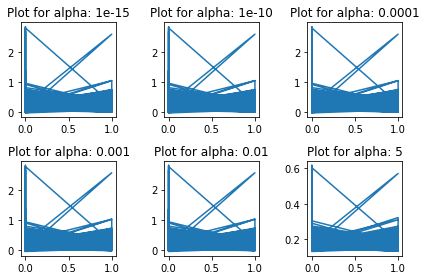

In [11]:
#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept','balance','income', 'Age', 'LTI','Months Delayed', 'student2']  #+ ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)


for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(X, y, alpha_ridge[i], models_to_plot)

In [12]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,balance,income,Age,LTI,Months Delayed,student2
alpha_1e-15,3.1e-12,0.12,1.2e-08,-4.7e-08,-0.00096,0.071,0.061,-0.0044
alpha_1e-10,-5.5e-13,0.12,1.2e-08,-4.7e-08,-0.00096,0.071,0.061,-0.0044
alpha_1e-08,9e-13,0.12,1.2e-08,-4.7e-08,-0.00096,0.071,0.061,-0.0044
alpha_0.0001,-6.3e-13,0.12,1.2e-08,-4.7e-08,-0.00096,0.071,0.061,-0.0044
alpha_0.001,-7.9e-13,0.12,1.2e-08,-4.7e-08,-0.00096,0.071,0.061,-0.0044
alpha_0.01,2.9e-12,0.12,1.3e-08,-4.7e-08,-0.00095,0.07,0.06,-0.0042
alpha_1,-5.5e-12,0.15,2.7e-08,-2.3e-08,-0.00064,0.034,0.03,0.0019
alpha_5,5.5e-12,0.16,1.3e-08,-6.6e-09,-0.00026,0.012,0.0097,0.0016
alpha_10,-2.7e-12,0.17,7.4e-09,-3.5e-09,-0.00015,0.0065,0.0053,0.00098
alpha_20,7.3e-12,0.17,4.1e-09,-1.8e-09,-8e-05,0.0034,0.0028,0.00055


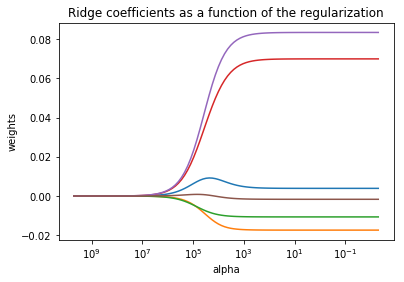

In [13]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

### The above plot shows that the Ridge coefficients get larger when we decrease alpha.

In [14]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64